In [1]:
import numpy as np 
from numpy import cov
import pandas as pd
from pandas import set_option
import csv
import re 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

C:\Users\THANH\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# Load dữ liệu vào

In [19]:
df = pd.read_csv('car.csv', delimiter='|',engine='python',error_bad_lines=False,warn_bad_lines=False, index_col=False,encoding='utf8')
df

,car_model,km,imp_exp,km_1,imp_exp_1,car_type,out_color,in_color,door_num,seat_num,new_old,car_year,title,price,area,poster_name,poster_add,poster_tel
0,acura-mdx,0 Km,Nhập khẩu,0 Km,Nhập khẩu,SUV,Đen,Đen,5 cửa,7 chỗ,Xe cũ,2007,Acura MDX SH-AWD - 2007,630 Triệu,TP HCM,Liên hệ: Salon ô tô Thịnh Lợi,"Số 56+58+60 (C3/1 cũ) Phạm Hùng, Bình Chánh TP...",ĐT: 0961 258 258 - 0943 331 999
1,acura-mdx,0 Km,Nhập khẩu,0 Km,Nhập khẩu,SUV,Bạc,Đen,5 cửa,7 chỗ,Xe cũ,2007,Acura MDX SH-AWD - 2007,580 Triệu,Hà Nội,Liên hệ: Ngô Quốc Huy,Nguyễn khánh toán Hà Nội,ĐT: 0903 245 739
2,acura-mdx,0 Km,Nhập khẩu,0 Km,Nhập khẩu,SUV,Bạc,Nhiều màu,5 cửa,7 chỗ,Xe cũ,2006,Acura MDX SH-AWD - 2006,465 Triệu,TP HCM,Liên hệ: Salon Auto Toàn Phát,"C1/25 Phạm Hùng Chánh Hưng, Bình Chánh TP HCM",ĐT: 0903 951 109 - 0938 595 373
3,acura-mdx,0 Km,Nhập khẩu,0 Km,Nhập khẩu,SUV,Đen,Kem,5 cửa,7 chỗ,Xe mới,2016,Acura MDX 3.5L - 2016,4 Tỷ 665 Triệu,TP HCM,Liên hệ: Ôtô Ngọc Danh,"C3/02 Phạm Hùng, Quận 8 TP HCM",ĐT: 0919 726 666
4,acura-mdx,"9,600 Km",Nhập khẩu,"9,600 Km",Nhập khẩu,SUV,Trắng,Cát,5 cửa,7 chỗ,Xe cũ,2015,Acura MDX 3.5L - 2015,3 Tỷ 400 Triệu,TP HCM,Liên hệ: Siêu Thị Ô Tô An Sương,"Nguyễn Ảnh Thủ, Bà Điểm, Hóc Môn TP HCM",ĐT: 0789 455 699 - 0993 777 977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39417,hang_khac,0 Km,Nhập khẩu,0 Km,Nhập khẩu,Truck,Trắng,Màu khác,2 cửa,2 chỗ,Xe cũ,2015,Đầu kéo mỹ - 2015,1 Tỷ 515 Triệu,Bình Dương,Liên hệ: Nguyễn Văn Mai,"10/9 Ql13, Khu Phố Tây, P. Vĩnh phú, Thuận An ...",ĐT: 0929 693 607
39418,hang_khac,0 Km,Lắp ráp trong nước,0 Km,Lắp ráp trong nước,Truck,Xanh,Màu khác,2 cửa,3 chỗ,Xe cũ,2011,Chiến Thắng - 2011,105 Triệu,Đăk Nông,Liên hệ: Thanh Tam,TP Buôn Ma Thuột Đăk Nông,ĐT: 0948 608 479
39419,hang_khac,"25,000 Km",Lắp ráp trong nước,"25,000 Km",Lắp ráp trong nước,Van/Minivan,Đen,Xanh,1 cửa,29 chỗ,Xe cũ,2017,FUSO - 2017,1 Tỷ 150 Triệu,Hà Nội,Liên hệ: Buitrunghau,"Phường hợp giang, tp cao bằng, cao bằng Hà Nội",ĐT: 0916 949 883
39420,hang_khac,0 Km,Lắp ráp trong nước,0 Km,Lắp ráp trong nước,Truck,Xanh,Màu khác,2 cửa,3 chỗ,Xe cũ,2008,Jac - 2008,80 Triệu,Gia Lai,Liên hệ: Tuệ Nguyễn Gioan,TP Pleiku Gia Lai,ĐT: 0985 161 280


# Mô tả các biến trong dữ liệu:
- car_model:      Tên của xe 
- km:  Số km mà xe đã đi
- imp_exp:        Xe là Nhập khẩu hay Lắp ráp trong nước
- km_1:           Số km mà xe đã đi 
- imp_exp_1:      Xe là Nhập khẩu hay Lắp ráp trong nước
- car_type:       Loại xe
- out_color:      Màu bên ngoài của xe
- in_color:       Màu bên trong của xe
- door_num:      Số cửa xe
- seat_num:       Số chỗ ngồi
- new_old:        Xe là mới hay cũ
- car_year:       Năm sản xuất của xe
- title:          Tựa đề bài rao bán
- price:          Giá xe
- area:           Khu vực 
- poster_name:    Tên người bán
- poster_add:     Địa chỉ người bán
- poster_tel:     Sđt người bán

# Các thuộc tính của dữ liệu

In [3]:
print('The dataset has {} instances and {} attributes.\n'.format(df.shape[0], df.shape[1]))
print('The attributes are : \n {} '.format(df.dtypes))

set_option('display.width', 100)

The dataset has 39422 instances and 18 attributes.

The attributes are : 
 car_model      object
km             object
imp_exp        object
km_1           object
imp_exp_1      object
car_type       object
out_color      object
in_color       object
door_num       object
seat_num       object
new_old        object
car_year       object
title          object
price          object
area           object
poster_name    object
poster_add     object
poster_tel     object
dtype: object 


# Sửa lại dữ liệu cột giá

In [4]:
price_list = []

for x in df['price']:
    word = []
    number = re.findall('\d+',x)
    word = re.findall(r'Tỷ',x)
    if (len(number) == 2):
        a = int(number[0]) *1e9 + int(number[1]) *1e6
    if (len(number) == 1):
        if (len(word) == 1):
            a = int(number[0]) *1e9
        else:
            a = int(number[0]) *1e6
    price_list.append(a)

df['price'] = price_list

# Kiếm tra xem có dữ liệu rỗng nào trong bảng không

In [5]:
print(df.isnull().sum())

car_model      0
km             0
imp_exp        0
km_1           0
imp_exp_1      0
car_type       0
out_color      0
in_color       0
door_num       0
seat_num       0
new_old        0
car_year       0
title          0
price          0
area           0
poster_name    0
poster_add     0
poster_tel     0
dtype: int64


<font color='Red'> 
# Câu hỏi 1: Thông kê số lượng các xe được bán ra nhiều nhất theo loại, hãng, màu,....

# Biểu đồ số lượng các loại xe bán ra theo loại

Text(0.5, 1.0, 'Biểu đồ số lượng xe bán ra theo từng loại')

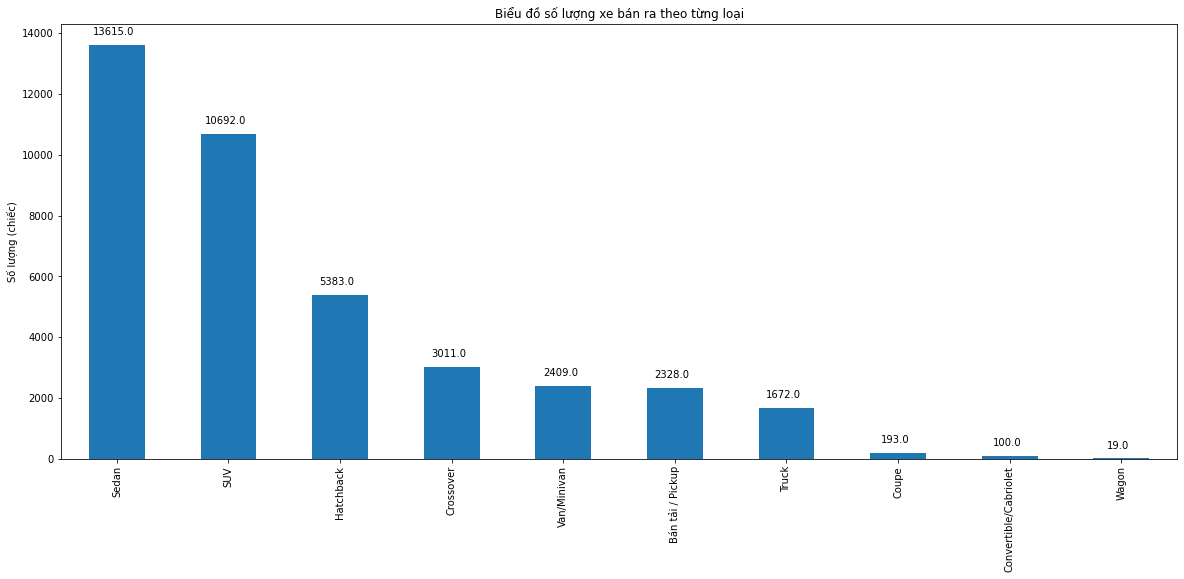

In [20]:
#Lọc ra các loại xe có trong bảng
car_model = df['car_type'].unique().tolist()
a = []

for x in car_model:
    a.append(df['car_type'].tolist().count(x))
#Sắp xếp các xe theo số lượng
zip_iterator = zip(car_model, a)
a_dictionary = dict(zip_iterator)
a_dictionary = sorted(a_dictionary.items(), key=lambda x: x[1], reverse=True)

x = []
y = [] 

for i in range(len(a_dictionary)):
    x.append(a_dictionary[i][0])
    y.append(a_dictionary[i][1])
    
most_sold_car_type = pd.Series(index = x)
#Vẽ biểu đồ
i = 0
for t in x:
    most_sold_car_type[t] = y[i]
    i = i+1 
    
plt.figure(figsize=(20,8))
ax = most_sold_car_type.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height() - 0.2 ), textcoords="offset points", xytext=(25,10),ha='center')
plt.ylabel('Số lượng (chiếc)')
plt.title('Biểu đồ số lượng xe bán ra theo từng loại')

- Nhận xét: Ta thấy những loại xe được bán nhiều nhất ở Việt Nam là Sedan và SUV,.. bới đây những loại xe thông dụng cho người dùng để đi lại phù họp với nhu cầu của đa phần người dân Việt Nam

# Biểu đồ số lượng xe bán ra theo hãng

Text(0.5, 1.0, 'Top 20 hãng xe bán ra nhiều nhất')

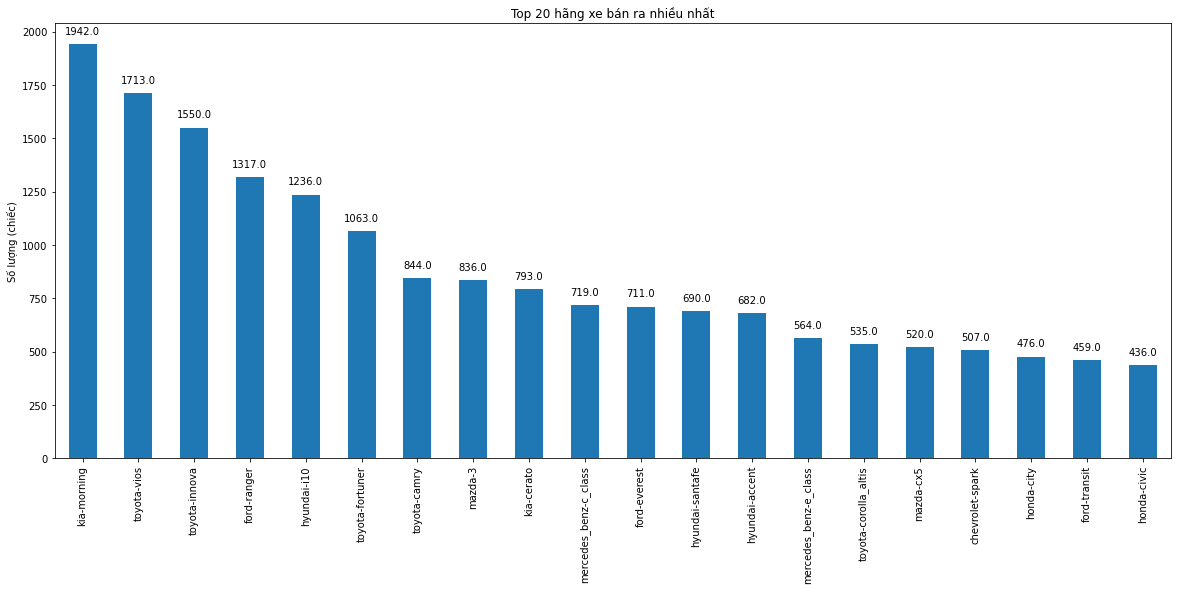

In [21]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
#Lọc ra các hãng xe có trong bảng
car_model = df['car_model'].unique().tolist()
a = []

for x in car_model:
    a.append(df['car_model'].tolist().count(x))
#Sắp xếp các hãng xe theo số lượng
zip_iterator = zip(car_model, a)
a_dictionary = dict(zip_iterator)
a_dictionary = sorted(a_dictionary.items(), key=lambda x: x[1], reverse=True)

b = a_dictionary[0:20]
x = []
y = []

for i in range(len(b)):
    x.append(b[i][0])
    y.append(b[i][1])
    
most_sold_car_model = pd.Series(index = x)
#Vẽ biểu đồ
i = 0
for t in x:
    most_sold_car_model[t] = y[i]
    i = i+1 
  
plt.figure(figsize=(20,8))
ax = most_sold_car_model.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() - 0.2 , p.get_height() - 0.2 ), textcoords="offset points", xytext=(25,10),ha='center')
plt.ylabel('Số lượng (chiếc)')
plt.title('Top 20 hãng xe bán ra nhiều nhất')

- Nhận xét: Những hãng bán ra xe nhiều là kia-morning, toyota, ford,... vì ta biết được giá xe ở Việt Nam khá cao và những hãng này đã có thương hiệu nhất định ở Việt Nam cộng thêm giá xe ở mức vừa phải, chất lượng xe ổn nên được đa số người dân Việt Nam ưa chuộng

# Biếu đồ số lượng xe bán ra theo màu

Text(0.5, 1.0, 'Xếp hạng màu xe bán ra nhiều nhất')

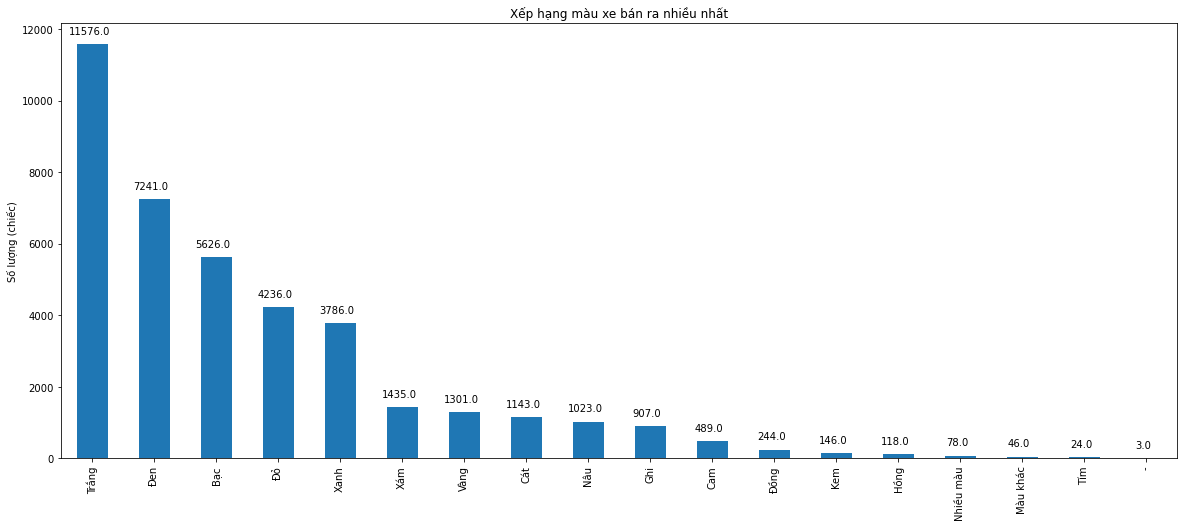

In [23]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
#Lọc ra các màu xe có trong bảng
car_color = df['out_color'].unique().tolist()
a = []

for x in car_color:
    a.append(df['out_color'].tolist().count(x))
#Sắp xếp các màu xe theo số lượng tăng dần
zip_iterator = zip(car_color, a)
a_dictionary = dict(zip_iterator)
a_dictionary = sorted(a_dictionary.items(), key=lambda x: x[1], reverse=True)

x = []
y = []

for i in range(len(a_dictionary)):
    x.append(a_dictionary[i][0])
    y.append(a_dictionary[i][1])
    
most_sold_car_color = pd.Series(index = x)
#Vẽ biểu đồ
i = 0
for t in x:
    most_sold_car_color[t] = y[i]
    i = i+1 
  
plt.figure(figsize=(20,8))
ax = most_sold_car_color.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() - 0.2 , p.get_height() - 0.2 ), textcoords="offset points", xytext=(25,10),ha='center')
plt.ylabel('Số lượng (chiếc)')
plt.title('Xếp hạng màu xe bán ra nhiều nhất')

- Nhận xét: Người dân Việt Nam đa phần ưa chuộng xe màu đen và trắng vì đây là 2 màu cơ bản nên ko lạ khi 2 màu này được bán nhiều nhất ở Việt Nam

# Biểu đồ số lượng xe bán ra theo giá

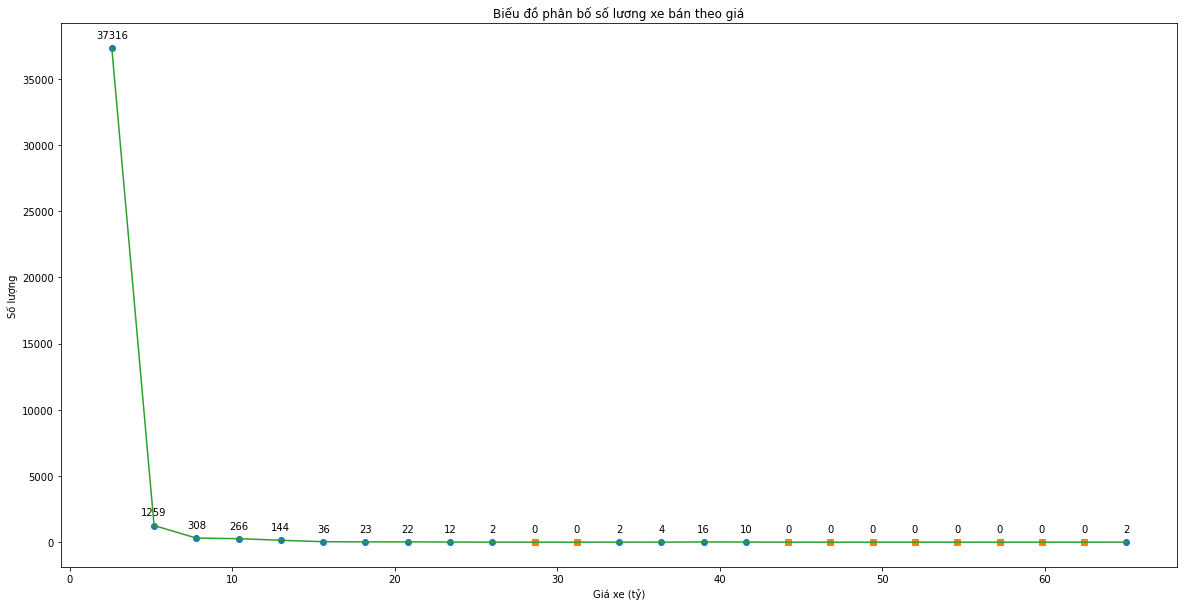

In [9]:
#Tính toán giá trị max, min giá xe và chia ra làm 25 khoảng bằng nhau
min_price = df['price'].min()
max_price = df['price'].max()

do_chia = max_price/25
price = []
price_label = []

for i in range(25):
    price.append((do_chia*(i+1)))
    price_label.append((do_chia*(i+1))/1e9)
#Sắp xếp các giá xe vào các khoảng phù hợp
price_range = pd.Series(index = price_label)

for j in range(25):
    price_range[price_label[j]] = int(0)

for i in range(len(df['price'])):
    for j in range(25):
        if(df['price'][i] <= float(price[j])):
            price_range[price_label[j]] =  price_range[price_label[j]]  + 1;
            break
a = price_range.index[price_range == 0].tolist()    
#Vẽ biểu đồ
xs = price_label
ys = price_range

fig = plt.figure(figsize=(20,10))
ax = plt.axes()
plt.plot(price_range, 'o') 
plt.plot(price_range[a], 's') 

for x,y in zip(xs,ys):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.plot(price_range)
plt.ylabel('Số lượng')
plt.xlabel('Giá xe (tỷ)')
plt.title('Biếu đồ phân bố số lương xe bán theo giá')
plt.show()

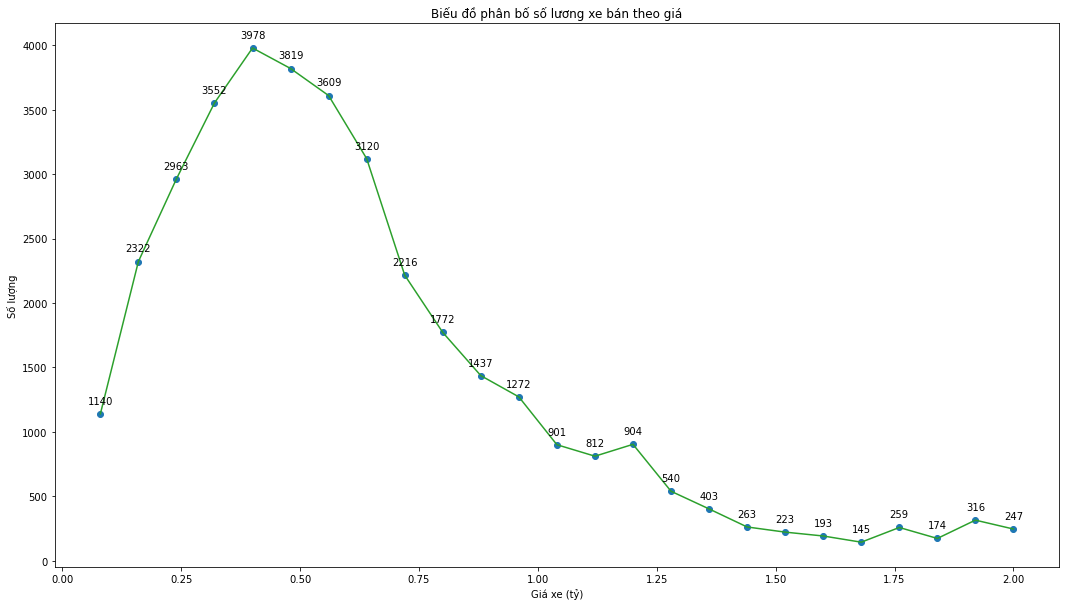

In [10]:
#Tương tự như trên nhưng chỉ từ khoảng từ 0 - 2 tỷ
do_chia = 2e9/25
price = []
price_label = []

for i in range(25):
    price.append((do_chia*(i+1)))
    price_label.append((do_chia*(i+1))/1e9)
    
price_range = pd.Series(index = price_label)

for j in range(25):
    price_range[price_label[j]] = int(0)

for i in range(len(df['price'])):
    for j in range(25):
        if(df['price'][i] <= float(price[j])):
            price_range[price_label[j]] =  price_range[price_label[j]]  + 1;
            break
a = price_range.index[price_range == 0].tolist()    

xs = price_label
ys = price_range

fig = plt.figure(figsize=(18,10))
ax = plt.axes()
plt.plot(price_range, 'o') 
plt.plot(price_range[a], 's') 

for x,y in zip(xs,ys):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.ylabel('Số lượng')
plt.xlabel('Giá xe (tỷ)')
plt.title('Biếu đồ phân bố số lương xe bán theo giá')
plt.plot(price_range)

plt.show()

- Nhận xét: Thu nhập bình quân đầu người ở Việt Nam khá thấp so với thế giới, nên hầu như người chúng ta không có nhiều tiền để mua xe, xe trong khoảng giá từ 100 triệu - 1 tỷ là khoảng mà được nhiều Việt săn đón nhất

# Biểu đồ số lượng xe bán ra theo thành phố

Text(0.5, 1.0, 'Top 20 thành phố bán xe ra nhiều nhất')

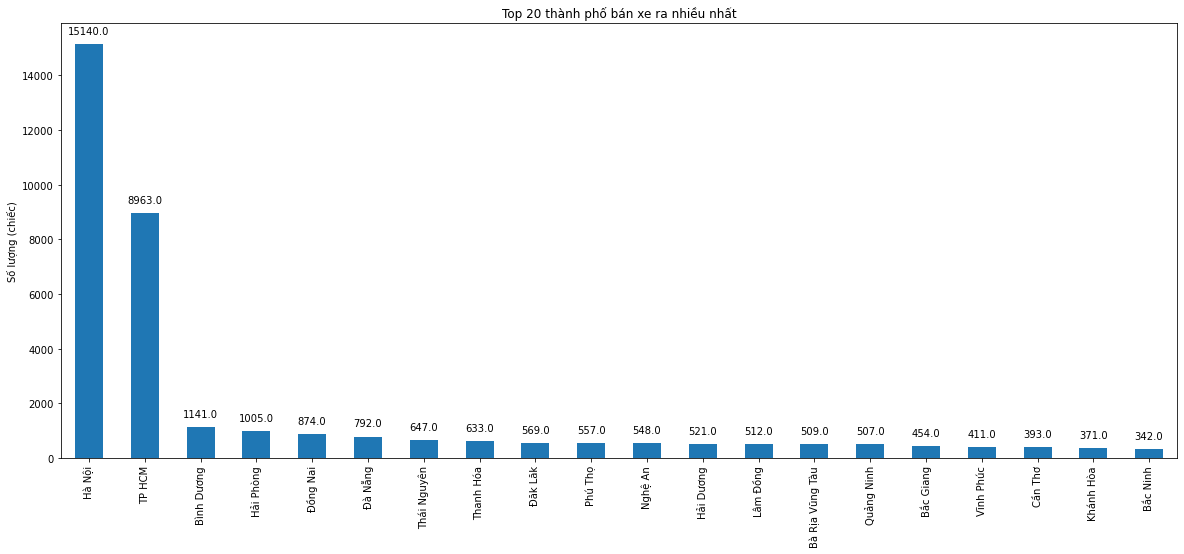

In [11]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
#Lọc ra các thành phố có trong bảng dữ liệu
area = df['area'].unique().tolist()
a = []

for x in area:
    a.append(df['area'].tolist().count(x))
#Sắp xếp các xe phù hợp
zip_iterator = zip(area, a)
a_dictionary = dict(zip_iterator)
a_dictionary = sorted(a_dictionary.items(), key=lambda x: x[1], reverse=True)

b = a_dictionary[0:20]
x = []
y = []

for i in range(len(b)):
    x.append(b[i][0])
    y.append(b[i][1])
    
most_sold_car_area = pd.Series(index = x)

i = 0
for t in x:
    most_sold_car_area[t] = y[i]
    i = i+1 
#Vẽ biểu đồ  
plt.figure(figsize=(20,8))
ax = most_sold_car_area.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() - 0.2 , p.get_height() - 0.2 ), textcoords="offset points", xytext=(25,10),ha='center')
plt.ylabel('Số lượng (chiếc)')
plt.title('Top 20 thành phố bán xe ra nhiều nhất')

- Nhận xét: Không có gì lạ khi HN và HCM là 2 nơi bán ra nhiều xe nhất ở Việt Nam vì là 2 thành phố lớn cả nước, người dân ở thu nhập cũng hơn so với số còn lại

## Ý nghĩa: Như vậy với việc rút ra các thuộc tính này thì ta có thể lựa chọn ra các loại xe với các đặc tính phù hợp như đã phân tích để có thể bán với nhiều người mua nhất

<font color='Red'> 
# Câu hỏi 2: Những xe nào có giá tiền cao nhất trong bảng ?

Text(0.5, 1.0, 'Top 20 xe gía tiền cao nhất')

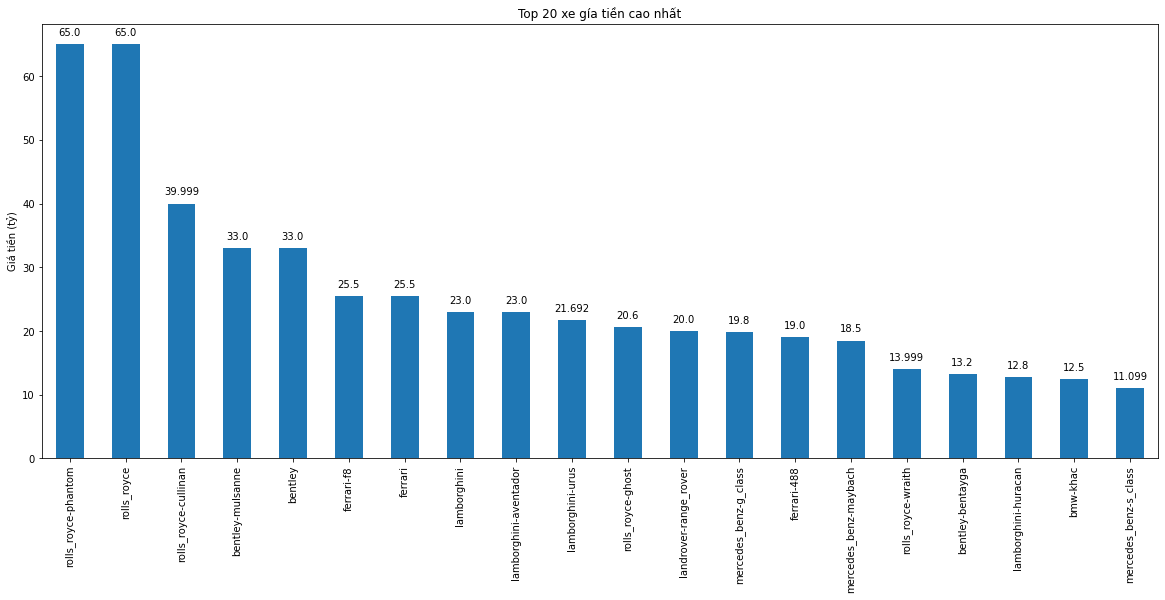

In [12]:
#Sắp xếp giá tiền theo thứ tự giảm dần
new_df = df.sort_values('price', ascending=False)
car_model = new_df['car_model'].unique()[0:20]

most_price_car = pd.Series(index = car_model)

i = 0
for x in car_model:
    most_price_car[x] = new_df['price'].where(new_df['car_model'] == x).max()/1e9
    i = i+1
    
most_price_car
#Vẽ biểu đồ
plt.figure(figsize=(20,8))
ax = most_price_car.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() - 0.2 , p.get_height() - 0.2 ), textcoords="offset points", xytext=(25,10),ha='center')
plt.ylabel('Giá tiền (tỷ)')
plt.title('Top 20 xe gía tiền cao nhất')

- Nhận xét: Đây là những dòng xe hạng sang của thế giới nên không khó hiểu giá của những chiếc xe này là cao ngất ngưởng

## Ý nghĩa: Chúng ta thấy được những xe có mức giá cao nhất đã từng được mua bán ở Việt Nam

<font color='Red'> 
# Câu hỏi 3: Những thuộc tính nào của xe ảnh đến giá tiền của xe và ảnh hưởng như thế nào ?

# Loại bỏ những thành phần không cần thiết trong bảng

In [13]:
df = df.drop(['title','poster_name','poster_add' ,'poster_tel','km_1','imp_exp_1'],axis =1)
def delete_unit(agr):
  return agr.split()[0]

df['km'] = df['km'].apply(delete_unit) 
df['door_num'] = df['door_num'].apply(delete_unit) 
df['seat_num'] = df['seat_num'].apply(delete_unit)

# Tiền xử lí dữ liệu số hoá dữ liệu thành dạng số

In [14]:
#Loại bỏ các kí tự thừa trong dữ liệu
df['km'] = df['km'].str.replace(r',','')
df['car_year'] = df['car_year'].str.replace(r'< 1990','1989')

df["km"] = df["km"].astype(np.int64)
df["door_num"] = df["door_num"].astype(np.int64)
df["seat_num"] = df["seat_num"].astype(np.int64)
df["car_year"] = df["car_year"].astype(np.int64)

In [15]:
#Lưu lại các dữ liệu trước khi bị số hóa
imp_exp = df["imp_exp"]
car_model = df["car_model"]
car_type = df["car_type"]
out_color = df["out_color"]
in_color = df["in_color"]
new_old = df["new_old"] 
area = df["area"]

In [16]:
#Chuyển đổi kiểu dữ liệu về dạng category
df["imp_exp"] = df["imp_exp"].astype('category')
df["car_model"] = df["car_model"].astype('category')
df["car_type"] = df["car_type"].astype('category')
df["out_color"] = df["out_color"].astype('category')
df["in_color"] = df["in_color"].astype('category')
df["new_old"] = df["new_old"].astype('category')
df["area"] = df["area"].astype('category')
#Số hóa dữ liệu
df["imp_exp"] = df["imp_exp"].cat.codes
df["car_model"] = df["car_model"].cat.codes
df["car_type"] = df["car_type"].cat.codes
df["out_color"] = df["out_color"].cat.codes
df["in_color"] = df["in_color"].cat.codes
df["new_old"] = df["new_old"].cat.codes
df["area"] = df["area"].cat.codes
df

,car_model,km,imp_exp,car_type,out_color,in_color,door_num,seat_num,new_old,car_year,price,area
0,0,0,1,5,15,15,5,7,0,2007,6.300000e+08,45
1,0,0,1,5,1,15,5,7,0,2007,5.800000e+08,17
2,0,0,1,5,1,8,5,7,0,2006,4.650000e+08,45
3,0,0,1,5,15,6,5,7,1,2016,4.665000e+09,45
4,0,9600,1,5,10,3,5,7,0,2015,3.400000e+09,45
...,...,...,...,...,...,...,...,...,...,...,...,...
39417,155,0,1,7,10,7,2,2,0,2015,1.515000e+09,2
39418,155,0,0,7,13,7,2,3,0,2011,1.050000e+08,60
39419,155,25000,0,8,15,13,1,29,0,2017,1.150000e+09,17
39420,155,0,0,7,13,7,2,3,0,2008,8.000000e+07,14


# Phân tích tỉ lệ tương quan giữa các biến

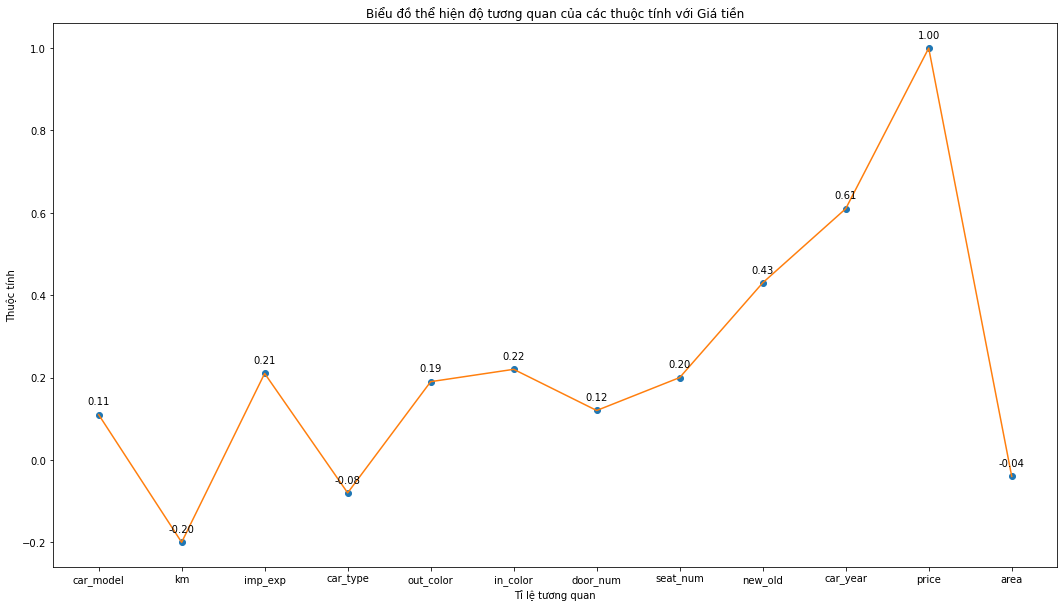

In [17]:
from scipy.stats import spearmanr
#Tính tỉ lệ tương quan giữa các biến với biến giá tiền
cov_list = []
for x in df.columns:
    temp, _ = spearmanr(df[x],df['price'])
    cov_list.append(f"{temp:.2f}")
    
for i in range(len(cov_list)):
    cov_list[i] = float(cov_list[i])
    
coor_df = pd.Series(index = df.columns)
i = 0
for x in df.columns:
    coor_df[x] = cov_list[i]
    i = i + 1

        
#Vẽ biểu đồ    
fig = plt.figure(figsize=(18,10))
ax = plt.axes()
plt.plot(coor_df, 'o') 

xs = np.arange(0,12,1)   
ys = coor_df
    
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.ylabel('Thuộc tính')
plt.xlabel('Tỉ lệ tương quan')
plt.title('Biểu đồ thể hiện độ tương quan của các thuộc tính với Giá tiền')
plt.plot(coor_df)

plt.show()

- Nhận xét: Dựa vào biếu đồ trên ta có thấy được những yếu nào ảnh hưởng đến giá xe nhiều như: car_year (Năm SX xe), new_old(mới/cũ),... 

# Ý nghĩa: Dựa vào các độ tương quan này, chúng ta có thể biết được yếu nào ảnh hưởng tới xe nhiều, yếu tố nào ảnh hưởng tới xe ít để từ đó ta có thể định giá được chiếc xe đó cho phù hợp 